In [2]:
# Read the July 7th power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2012-07-power-survey-london.csv")

In [3]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-07-01 00:00:00,21.281,1.229,9.511,37.568,149.347,67.261,12.791,32.020,2.277,...,58,81,55,69,599,23,3368,478.590,0.142099,0.177092
1,2012-07-01 00:30:00,18.722,0.968,7.804,31.962,148.770,62.054,10.789,31.575,2.256,...,58,81,55,71,597,23,3369,480.447,0.142608,0.214239
2,2012-07-01 01:00:00,17.238,0.880,7.187,30.977,134.489,56.691,9.942,29.536,2.063,...,58,81,55,71,597,23,3369,434.089,0.128848,0.190269
3,2012-07-01 01:30:00,15.889,0.895,6.942,31.407,117.296,52.265,10.522,26.220,2.052,...,58,81,55,71,597,23,3369,392.503,0.116504,0.160527
4,2012-07-01 02:00:00,15.115,1.531,6.890,31.069,107.810,48.240,10.225,25.614,2.109,...,58,81,55,71,597,23,3369,368.343,0.109333,0.138210


In [4]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [5]:
# Create a dataframe representing energy consumption for July 7th, 2012, the day
# of the Wimbeldon Womens' Tennis Match.

df_Wimbeldon_Womens_7_7 = df.loc[df['day']==7]
df_Wimbeldon_Womens_7_7 = df_Wimbeldon_Womens_7_7.set_index(df_Wimbeldon_Womens_7_7["tstamp"])
df_Wimbeldon_Womens_7_7.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-07-07 00:00:00,18.019,1.246,10.368,37.514,150.791,66.375,13.216,30.217,3.027,...,58,80,632,25,3545,476.453000,0.134401,0.160025,7,0:00
0:30,2012-07-07 00:30:00,16.113,0.907,10.517,34.908,157.104,61.293,10.256,28.111,2.323,...,58,80,632,25,3547,493.469000,0.139123,0.218510,7,0:30
1:00,2012-07-07 01:00:00,15.385,1.009,9.453,31.220,142.264,55.518,9.786,26.338,2.052,...,58,80,632,25,3547,441.262000,0.124404,0.193392,7,1:00
1:30,2012-07-07 01:30:00,15.051,0.899,8.506,30.810,126.794,52.137,10.565,27.232,2.079,...,58,80,632,25,3547,403.798000,0.113842,0.162402,7,1:30
2:00,2012-07-07 02:00:00,14.387,0.911,7.648,27.923,120.789,50.254,10.194,25.394,1.901,...,58,80,632,25,3547,383.194001,0.108033,0.148221,7,2:00


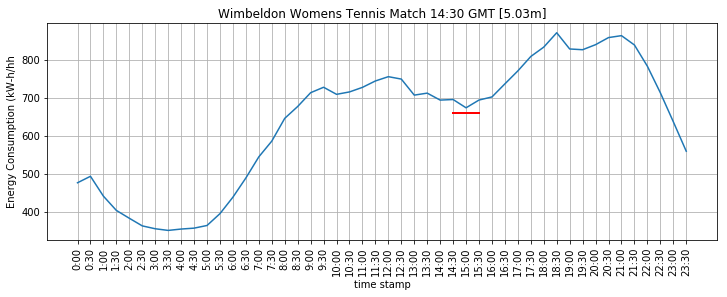

In [12]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],df_Wimbeldon_Womens_7_7["sigma"])
plt.xticks(rotation='vertical')
plt.title("Wimbeldon Womens Tennis Match 14:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:30', '15:30'], [660, 660], color='r', linestyle='-', linewidth=2)
plt.show()

In [9]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_Wimbeldon_Womens_7_7["A_sigma"] + df_Wimbeldon_Womens_7_7["B_sigma"] + df_Wimbeldon_Womens_7_7["C_sigma"]
Acorn2  = df_Wimbeldon_Womens_7_7["D_sigma"] + df_Wimbeldon_Womens_7_7["E_sigma"]
Acorn3  = df_Wimbeldon_Womens_7_7["F_sigma"] + df_Wimbeldon_Womens_7_7["G_sigma"] + df_Wimbeldon_Womens_7_7["H_sigma"] \
                                           + df_Wimbeldon_Womens_7_7["I_sigma"] + df_Wimbeldon_Womens_7_7["J_sigma"]
Acorn4  = df_Wimbeldon_Womens_7_7["K_sigma"] + df_Wimbeldon_Womens_7_7["L_sigma"] + df_Wimbeldon_Womens_7_7["M_sigma"] \
                                           + df_Wimbeldon_Womens_7_7["N_sigma"]
Acorn5  = df_Wimbeldon_Womens_7_7["O_sigma"] + df_Wimbeldon_Womens_7_7["P_sigma"] + df_Wimbeldon_Womens_7_7["Q_sigma"]

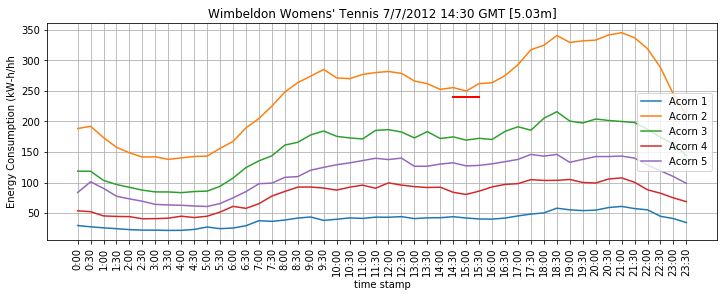

In [11]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Wimbeldon Womens' Tennis 7/7/2012 14:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:30', '15:30'], [240, 240], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [13]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

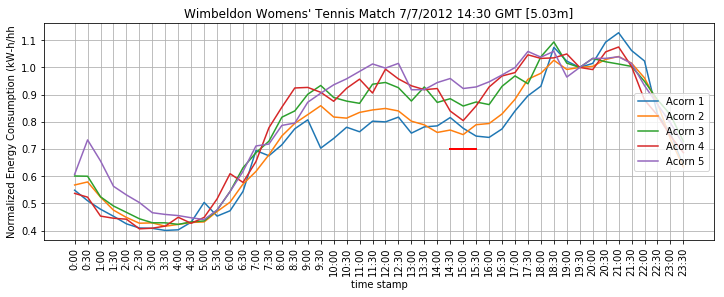

In [15]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Wimbeldon_Womens_7_7["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Wimbeldon Womens' Tennis Match 7/7/2012 14:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:30', '15:30'], [0.7, 0.7], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()